# AI Project - Phase 2 (Destination Suggestion)
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> DR. Mahdieh Soleymani | DR. MohammadHossein Rohban </h2>
<h3 style = "color: cyan"> Head of Project: AmirHossein Razlighi <h3>
<h3 style = "color: cyan"> Designed By: AmirHossein Razlighi, Javad Hezareh, Payam Taebi, Alireza Sakhaei, Ali Banayeean, Yalda Shabanzadeh, Hamidreza Yaghoubi, Alireza Heidari <h3>
<h4 style = "color: white"> Ask your questions via quera</h4>
<h5> Save your file with format: STUDENT NUMBER_Phase2.ipynb or .zip </h5>
</div>

## Overview

<div style="text-align: center">
<img src="./Images/Uber_research.jpg" width="100%" height="auto" />
</div>

Suppose you are a research engineer at Uber and you are asked to design a system that suggests destinations to the passengers. The system should be able to suggest destinations based on the passenger's history. For example, one passenger may save a variety of locations (like home, work, gym, etc.). This passenger may go to gym, often on weekends and when he/she requests a car from Home.

So, for example, if I am a student, going to university usually from Saturday to Wednesday on 8:00 from "home", the next time I request a car from "home" on 8:00, the system should suggest "university" as the destination. Now, it's not that simple always, so we should seek for smart wayys to solve this problem!

As you may understood by now, we should engineer some of features from the data we have and try to predict the next destination of the passenger.

Let's begin!

## Setup

In [1]:
%pip install pyrosm keplergl haversine pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 44.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp310-cp310-linux_x86_64.whl
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for pyrosm: filename=pyrosm-0.6.2-cp310-cp310-linux_x86_64.whl size=7459934 sha256=d34ca6f115480e91d0a614ff1c735a0a520b86c23501a77bec70b3934ded9a8a

In [2]:
import datetime
import numpy as np
import pandas as pd
import pyrosm
import random
import ssl
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
from copy import deepcopy
from tqdm import tqdm


from keplergl import KeplerGl
from pyrosm import OSM, get_data

In [3]:
import random
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random.seed(2024)
np.random.seed(2024)

# First Approach: Using KNN

## Data Preparation for KNN

In this part, you should prepare the data for KNN. You should load the dataset file that we provided, named `Data/output.json` and then clean it, do all the required preprocessings and then split into train-test-val sets if necessary. Note that we provided a splitted test set for you, named `Data/output_test.json`. You should not use this file for training or validation. You should only use it for testing your model.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# TODO: Load the dataset for training
df_train = pd.read_json('/content/drive/My Drive/ArtIntell/Data/output.json')
df_train.head()


,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [6]:
# TODO: Load the dataset for testing
test_df = pd.read_json('/content/drive/My Drive/ArtIntell/Data/output_test.json')
test_df.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price
0,24,6,35.650,51.225,35.640,51.270,2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,35.625,51.250,35.690,51.295,2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,35.650,51.225,35.865,51.045,2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,35.875,51.375,35.890,51.315,2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,35.625,51.375,35.650,51.385,2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [7]:
# print out the number of unique users and also randomly select one user
n_users = df_train['user_id'].unique().shape[0]
user = random.choice(df_train['user_id'])
n_users, user

(60, 52)

In [9]:
# Uncomment the following line if you are using Google Colab
from google.colab import output
output.enable_custom_widget_manager()

In [12]:
the_df = df_train[df_train['user_id'] == user][['dest lat', 'dest lon']]

In [14]:
# choose the data related to the randomly selected user
# show destinations of this user on map
# You should Use Kepler.gl to visualize the data

the_map = KeplerGl(height=600, width=800)

the_map.add_data(data=the_df, name='the_map')

the_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'the_map': {'index': [15288, 15289, 15290, 15291, 15292, 15293, 15294, 15295, 15296, 15297, 152…

Here, you should do feature engineering stuff! Extract the features that you think are important. Split the features into training set and also extract the related outputs (used for our model further). These outputs may be strings (name of destination) or destination's latitude/longitude or etc. Use your creativity!

In [15]:
df_train.shape, test_df.shape

((17994, 9), (4499, 9))

We use the trip time (in minutes) as a training feature.

In [16]:
df_train['trip_time'] = df_train['end_time'] - df_train['start_time']
test_df['trip_time'] = test_df['end_time'] - test_df['start_time']

df_train['trip_time'] = df_train['trip_time'].apply(datetime.timedelta.total_seconds) / 60
test_df['trip_time'] = test_df['trip_time'].apply(datetime.timedelta.total_seconds) / 60


In [17]:
df_train.head()

,user_id,Day,origin lat,origin lon,dest lat,dest lon,start_time,end_time,price,trip_time
0,0,0,35.625,51.375,36.000,51.085,2024-01-30 13:07:00,2024-01-30 14:43:00,43.99,96.0
1,0,0,36.000,51.085,35.625,51.375,2024-01-30 15:13:00,2024-01-30 16:49:00,36.66,96.0
2,0,0,35.680,51.445,35.745,51.465,2024-01-30 20:41:00,2024-01-30 20:54:00,15.08,13.0
3,0,0,35.745,51.465,35.680,51.445,2024-01-30 21:24:00,2024-01-30 21:37:00,10.00,13.0
4,0,1,35.625,51.375,35.680,51.445,2024-01-30 23:38:00,2024-01-30 23:58:00,19.48,20.0


In [21]:
training_features = []
for col in df_train.columns:
    if col in ['dest lat', 'dest lon','start_time'	,'end_time']:
        continue
    training_features.append(col)

x_train = df_train[training_features]
y_train = df_train[['dest lat', 'dest lon']]

x_test = test_df[training_features]
y_test = test_df[['dest lat', 'dest lon']]

In [24]:
# print out the shape of the train and test dataframes
print('train:')
print(f'({x_train.shape}, {y_train.shape})')
print('\ntest')
print(f'({x_test.shape}, {y_test.shape})')

train:
((17994, 6), (17994, 2))

test
((4499, 6), (4499, 2))


## KNN Model

In this section, we are going to implement our KNN model. For further information on how KNN works, please refer to [this](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) link. As you can see, it's a simple algorithm. We will start with this and see the results of our _destination suggestion_ system.

In [29]:
# Define the model
# TODO: You can change the signature of functions and also add any function you need
from collections import Counter

class NearestNeighbor():
    def __init__(self ,k=5):
        self.X_train = None
        self.y_train = None
        self.tolerance = 1e-4
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, x: pd.DataFrame):
        # Calculate distances between x and all examples in the training set

        # distances = np.linalg.norm(self.X_train - x, axis=1)
        distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
        # Find indices of the k nearest examples
        nearest_indexes = np.argsort(distances)[:self.k].values

        prs = []
        for i in range(len(self.y_train.iloc[nearest_indexes])):
            prs.append((self.y_train.iloc[nearest_indexes]['dest lat'].iloc[i], self.y_train.iloc[nearest_indexes]['dest lon'].iloc[i]))
        pr_ctr = Counter(prs)
        freq_pr, frequency = pr_ctr.most_common(1)[0]
        freq_pr_index = prs.index(freq_pr)
        return freq_pr


    def check_prediction(self, pred, truth):
        return 1 if (np.abs(pred[0] - truth['dest lat']) < self.tolerance) and (np.abs(pred[1] - truth['dest lon']) < self.tolerance) else 0


    def calculate_accuracy(self, x_df, target_df):
        foo = 0
        for col in range(len(x_df)):
          foo += self.check_prediction(self.predict(x_df.iloc[col]), target_df.iloc[col])
        return foo / len(x_df)

for $k=1$ :

In [30]:
# Fit the model on training data

nn_model = NearestNeighbor(k=1)
nn_model.fit(x_train,y_train)

In [31]:
nn_model.predict(x_train.iloc[10])

(35.68, 51.445)

In [32]:
y_train.iloc[10]

dest lat    35.680
dest lon    51.445
Name: 10, dtype: float64

In [33]:
# Calculate the accuracy on training data
nn_model.calculate_accuracy(x_train,y_train)

0.9981660553517839

In [34]:
# Calculate the accuracy on test data
nn_model.calculate_accuracy(x_test,y_test)

0.2482773949766615

for $k=3$ :

In [40]:
nn_model_3 = NearestNeighbor(k=3)
nn_model_3.fit(x_train,y_train)

print('train acc:')
print(nn_model_3.calculate_accuracy(x_train, y_train))
print('test acc:')
print(nn_model_3.calculate_accuracy(x_test, y_test))

train acc:
0.8890185617428031
test acc:
0.2576128028450767


for $k=5$ :

In [41]:
nn_model_5 = NearestNeighbor(k=5)
nn_model_5.fit(x_train,y_train)

print('train acc:')
print(nn_model_5.calculate_accuracy(x_train, y_train))
print('test acc:')
print(nn_model_5.calculate_accuracy(x_test, y_test))

train acc:
0.7033455596309881
test acc:
0.2665036674816626


for $k = 7$:

In [42]:
nn_model_7 = NearestNeighbor(k=7)
nn_model_7.fit(x_train,y_train)

print('train acc:')
print(nn_model_7.calculate_accuracy(x_train,y_train))
print('test acc:')
print(nn_model_7.calculate_accuracy(x_test,y_test))

train acc:
0.5845281760586862
test acc:
0.26983774172038233


**QUESTION**: What do you think about this approach? Is it a good idea to use KNN for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

**Your Answer**:



This is not model based. So cannot be reliable when the data gets more complicated or the hypothesis set gets larger. As we can see, in this approach we don't get a good out of sample accuracy.

# Second Approach: Using XGBoost

In this part, we are going to use XGBoost to predict the next destination of the passenger. You can use `xgboost` library to implement this model. To learn more about XGBoost, please refer to [this](https://en.wikipedia.org/wiki/XGBoost) link. It should be familiar to you, as you saw decision trees in the class.

For this part, you can use the same data (that you did all the processes on) from the previous part. Or, if you need, you can reload the dataset and do new preprocessings on it.

You can see the overview of how XGBoost works in the image below:

<dev style="text-align: center">
<img src="./Images/XGBoost.png" />
</dev>

Although, this is for more information and you **do not** need to implement `XGBoost` from scratch. You can use the library that we mentioned above.

In [22]:
%pip install xgboost

In [43]:
import xgboost as xgb

# Defining the model
# TODO: You can change the signature of functions and also add any function you need

class Encoder():
    def __init__(self):
        self.labels_table = None
        self.inverse_table = None
        self.n_classes = None


    def fit(self, y):
        foo = []
        for i in range(len(df_train)):
          foo.append((df_train.iloc[i]['origin lat'], df_train.iloc[i]['origin lon']))
          foo.append((df_train.iloc[i]['dest lat'], df_train.iloc[i]['dest lon']))

        dist_foo = set(foo)
        labels_dict_inverse = {}
        labels_dict = {}
        for idx,pr in enumerate(dist_foo):
            labels_dict_inverse[idx] = pr
            labels_dict[pr] = idx
        self.n_classes = len(dist_foo)
        self.inverse_table = labels_dict_inverse
        self.labels_table = labels_dict


    def transform(self, y):
        return self.labels_table[y]


    def inverse_transform(self, encoded):
        return self.inverse_table[encoded]


    def encode_df(self, y_df):
        return [self.transform((y_df.iloc[i]['dest lat'], y_df.iloc[i]['dest lon'])) for i in range(len(y_df))]

In [44]:
encoder = Encoder()
encoder.fit(y_train)

encoded_y_train = encoder.encode_df(y_train)
encoded_y_test = encoder.encode_df(y_test)

In [45]:
print('targets before transform: ')
for i in range(5):
    print(f"({y_train.iloc[i]['dest lat']},{y_train.iloc[i]['dest lon']})")
    print(', ')

print()
print('targets after transform: ')
for i in range(5):
    print(f"({encoder.transform((y_train.iloc[i]['dest lat'], y_train.iloc[i]['dest lon']))})")
    print(', ')

print()
print('targets after inverse-transform: ')
for i in range(5):
    print(f"{encoder.inverse_transform(encoded_y_train[i])}")
    print(', ')


targets before transform: 
(36.0,51.085)
, 
(35.625,51.375)
, 
(35.745,51.465)
, 
(35.68,51.445)
, 
(35.68,51.445)
, 

targets after transform: 
(21)
, 
(108)
, 
(23)
, 
(31)
, 
(31)
, 

targets after inverse-transform: 
(36.0, 51.085)
, 
(35.625, 51.375)
, 
(35.745, 51.465)
, 
(35.68, 51.445)
, 
(35.68, 51.445)
, 


## Define and train `xgboost` classifier

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = xgb.XGBClassifier(objective='multi:softmax', num_class=encoder.n_classes)
model.fit(x_train, encoded_y_train)

# Make predictions
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

train_acc = accuracy_score(encoded_y_train, y_pred_train)
test_acc = accuracy_score(encoded_y_test, y_pred)

print(f'train acc: {train_acc * 100.0}%')
print(f'test acc: {test_acc * 100.0}%')

train acc: 99.3942425252862%
test acc: 65.10335630140031%


In [48]:
# TODO: transform the training and test data
# and fit the model on training data
classifier = xgb.XGBClassifier()
...

Ellipsis

**QUESTION**: What do you think about this approach? Is it a good idea to use XGBoost for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: <br/>
Since this is a tree based ensemble model, we can make training accuracy as high as we want. But It might not work well on test data as the pattern gets more complicated. In the complicated patterns, It is a good idea to learn hierarchical features like Neural Network. So this is not a good model for complicated patterns.

**Question**: Please explain the problem of overfitting in XGBoost. How can you solve it? Provide a brief explanation.

Your Answer: <br/>
One approach for solving overfitting is branch pruning. This decreases the generalization error.

----
---
---

# Third Approach: Classifier Using Neural Networks

In this approach, we are going to use a classifier using neural networks. You can think of this approach and how to model the problem as a classification problem in many ways! So, we are not going to restrict your creativity. Just a hint: You can consider each of the unique destinations (in whole dataset) as a class and then train a classifier to classify the destinations.

## Data for Neural Network

Let's prepare the data for our neural network. Again, you should extract required features from the dataset and then split the dataset into train-test-val sets if necessary. For your ease, we prepared another version of `output.json` that helps you to extract features for this part, easier. So, please load `Data/trip_data.json` and use it for training set and validation set. You should use `Data/trip_data_test.json` for testing your model.

In [ ]:
# load the training dataset
df_train = pd.read_json('/content/drive/My Drive/ArtIntell/Data/trip_data.json')
df_train.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,0,0,"[work, [35.625, 51.375]]","[restaurant, [36.0, 51.085]]",2024-01-30 13:07:00,2024-01-30 14:43:00,43.99
1,0,0,"[restaurant, [36.0, 51.085]]","[work, [35.625, 51.375]]",2024-01-30 15:13:00,2024-01-30 16:49:00,36.66
2,0,0,"[home, [35.68, 51.445]]","[restaurant, [35.745, 51.465]]",2024-01-30 20:41:00,2024-01-30 20:54:00,15.08
3,0,0,"[restaurant, [35.745, 51.465]]","[home, [35.68, 51.445]]",2024-01-30 21:24:00,2024-01-30 21:37:00,10.00
4,0,1,"[work, [35.625, 51.375]]","[home, [35.68, 51.445]]",2024-01-30 23:38:00,2024-01-30 23:58:00,19.48


In [ ]:
# load the test dataset
test_df = pd.read_json('/content/drive/My Drive/ArtIntell/Data/trip_data_test.json')
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price
0,24,6,"[pool, [35.65, 51.225]]","[home, [35.64, 51.27]]",2024-01-30 11:58:00,2024-01-30 12:12:00,10.00
1,46,2,"[university, [35.625, 51.25]]","[restaurant, [35.69, 51.295]]",2024-01-30 21:58:00,2024-01-30 22:18:00,11.84
2,27,5,"[pool, [35.65, 51.225]]","[restaurant, [35.865, 51.045]]",2024-01-30 20:05:00,2024-01-30 20:58:00,23.36
3,7,4,"[work, [35.875, 51.375]]","[home, [35.89, 51.315]]",2024-01-30 17:39:00,2024-01-30 18:17:00,13.74
4,27,3,"[work, [35.625, 51.375]]","[restaurant, [35.65, 51.385]]",2024-01-30 13:16:00,2024-01-30 13:19:00,15.08


In [ ]:
# Extract features and do preprocessing if needed
def f1(x):
  return x[1][0]
def f2(x):
  return x[1][1]
def f3(x):
  return x[0]
def f4(x):
  return x.time()

# origin
df_train['Origin Lat'] = df_train['origin'].apply(f1)
df_train['Origin Lon'] = df_train['origin'].apply(f2)
df_train['origin'] = df_train['origin'].apply(f3)

# destination
df_train['Dest Lat'] = df_train['destination'].apply(f1)
df_train['Dest Lon'] = df_train['destination'].apply(f2)
df_train['destination'] = df_train['destination'].apply(f3)

# times
df_train['start_time'] = df_train['start_time'].apply(f4)
df_train['end_time'] = df_train['end_time'].apply(f4)

In [ ]:
df_train.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Lon,Dest Lat,Dest Lon
0,0,0,work,restaurant,13:07:00,14:43:00,43.99,35.625,51.375,36.000,51.085
1,0,0,restaurant,work,15:13:00,16:49:00,36.66,36.000,51.085,35.625,51.375
2,0,0,home,restaurant,20:41:00,20:54:00,15.08,35.680,51.445,35.745,51.465
3,0,0,restaurant,home,21:24:00,21:37:00,10.00,35.745,51.465,35.680,51.445
4,0,1,work,home,23:38:00,23:58:00,19.48,35.625,51.375,35.680,51.445


In [ ]:
# origin
test_df['Origin Lat'] = test_df['origin'].apply(f1)
test_df['Origin Lon'] = test_df['origin'].apply(f2)
test_df['origin'] = test_df['origin'].apply(f3)

# destination
test_df['Dest Lat'] = test_df['destination'].apply(f1)
test_df['Dest Lon'] = test_df['destination'].apply(f2)
test_df['destination'] = test_df['destination'].apply(f3)

# times
test_df['start_time'] = test_df['start_time'].apply(f4)
test_df['end_time'] = test_df['end_time'].apply(f4)

In [ ]:
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Lon,Dest Lat,Dest Lon
0,24,6,pool,home,11:58:00,12:12:00,10.00,35.650,51.225,35.640,51.270
1,46,2,university,restaurant,21:58:00,22:18:00,11.84,35.625,51.250,35.690,51.295
2,27,5,pool,restaurant,20:05:00,20:58:00,23.36,35.650,51.225,35.865,51.045
3,7,4,work,home,17:39:00,18:17:00,13.74,35.875,51.375,35.890,51.315
4,27,3,work,restaurant,13:16:00,13:19:00,15.08,35.625,51.375,35.650,51.385


In [ ]:
for col in df_train.columns:
  unique_val = df_train[col].unique()
  print(f'\nColumn: {col}')
  print(f'Unique values:')
  print(*unique_val, sep=', ',end='')
  print('\n','='*30)


Column: user_id
Unique values:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59

Column: Day
Unique values:
0, 1, 2, 3, 4, 6, 5

Column: origin
Unique values:
work, restaurant, home, park, university, gym, pool

Column: destination
Unique values:
restaurant, work, home, park, university, gym, pool

Column: start_time
Unique values:
13:07:00, 15:13:00, 20:41:00, 21:24:00, 23:38:00, 07:59:00, 21:19:00, 07:55:00, 14:11:00, 20:08:00, 21:03:00, 07:00:00, 13:50:00, 14:23:00, 21:40:00, 22:28:00, 20:28:00, 22:01:00, 12:05:00, 12:54:00, 17:29:00, 13:44:00, 14:59:00, 17:36:00, 07:49:00, 20:40:00, 22:21:00, 17:33:00, 21:51:00, 07:54:00, 13:35:00, 16:30:00, 22:35:00, 08:19:00, 11:24:00, 08:56:00, 12:17:00, 07:06:00, 07:42:00, 13:15:00, 13:53:00, 21:20:00, 07:51:00, 12:37:00, 13:40:00, 17:32:00, 20:46:00, 21:38:00, 22:07

In [ ]:
print('DataFrame Column Head and Data Type:')
print('========================================')
for col in df_train.columns:
  print(f'Column: {col}')
  print(f'Data Type: {df_train[col].dtype}')
  print('-'*30)

DataFrame Column Head and Data Type:
Column: user_id
Data Type: int64
------------------------------
Column: Day
Data Type: int64
------------------------------
Column: origin
Data Type: object
------------------------------
Column: destination
Data Type: object
------------------------------
Column: start_time
Data Type: object
------------------------------
Column: end_time
Data Type: object
------------------------------
Column: price
Data Type: float64
------------------------------
Column: Origin Lat
Data Type: float64
------------------------------
Column: Origin Lon
Data Type: float64
------------------------------
Column: Dest Lat
Data Type: float64
------------------------------
Column: Dest Lon
Data Type: float64
------------------------------


Based on your features and how you extracted them, you may need to use some encodings for your data. For example, if you have different classes as names (`str` data type. E.g. "gym") you need to make it a numeric value in order to feed it into your neural network. You can use `sklearn`'s functions (such as `LabelEncoder`, `OneHotEncoder`, `StandardScaler`, etc.) to do these kind of stuff!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

define Encoders:

In [ ]:
lat_sc = StandardScaler()
lon_sc = StandardScaler()
price_sc = StandardScaler()
place_encoder = LabelEncoder()
time_sc = StandardScaler()
time_encoder = LabelEncoder()
userID_encoder = StandardScaler()
day_encoder = StandardScaler()

Fit and transform encoders:

In [ ]:
time_encoder.fit(df_train[['start_time', 'end_time']].values.flatten())
place_encoder.fit(df_train[['origin',	'destination']].values.flatten())
lat_sc.fit(df_train[['Origin Lat','Dest Lat']].values.flatten().reshape(-1, 1))
lon_sc.fit(df_train[['Origin Lon','Dest Lon']].values.flatten().reshape(-1, 1))
price_sc.fit(df_train['price'].values.reshape(-1, 1))
encoded_user_id = userID_encoder.fit_transform(df_train['user_id'].values.reshape(-1, 1))
encoded_Day = day_encoder.fit_transform(df_train['Day'].values.reshape(-1, 1))

# fit and transform on training dataset
df_train['origin'] = place_encoder.transform(df_train['origin'])
df_train['destination'] = place_encoder.transform(df_train['destination'])
df_train['price'] = price_sc.transform(df_train['price'].values.reshape(-1, 1))
df_train['Origin Lat'] = lat_sc.transform(df_train['Origin Lat'].values.reshape(-1, 1))
df_train['Dest Lat'] = lat_sc.transform(df_train['Dest Lat'].values.reshape(-1, 1))
df_train['Origin Lon'] = lon_sc.transform(df_train['Origin Lon'].values.reshape(-1, 1))
df_train['Dest Lon'] = lon_sc.transform(df_train['Dest Lon'].values.reshape(-1, 1))
df_train['start_time'] = time_encoder.transform(df_train['start_time'])
df_train['end_time'] = time_encoder.transform(df_train['end_time'])
time_sc.fit(df_train[['start_time', 'end_time']].values.flatten().reshape(-1, 1))
df_train['start_time'] = time_sc.transform(df_train['start_time'].values.reshape(-1, 1))
df_train['end_time'] = time_sc.transform(df_train['end_time'].values.reshape(-1, 1))
df_train['user_id'] = userID_encoder.transform(df_train['user_id'].values.reshape(-1, 1))
df_train['Day'] = day_encoder.transform(df_train['Day'].values.reshape(-1, 1))

In [ ]:
df_train.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Lon,Dest Lat,Dest Lon
0,-1.744927,-1.396079,6,4,-0.344335,-0.030587,2.614974,-0.873240,0.978733,1.742411,-1.298592
1,-1.744927,-1.396079,4,6,0.067460,0.381208,1.793070,1.742411,-1.298592,-0.873240,0.978733
2,-1.744927,-1.396079,1,4,1.139433,1.181920,-0.626668,-0.489612,1.528432,-0.036232,1.685489
3,-1.744927,-1.396079,4,1,1.279966,1.322453,-1.196282,-0.036232,1.685489,-0.489612,1.528432
4,-1.744927,-0.875942,6,1,1.717906,1.783270,-0.133301,-0.873240,0.978733,-0.489612,1.528432


transform test dataset:

In [ ]:
test_df['start_time'] = time_sc.transform(test_df['start_time'].values.reshape(-1, 1))
test_df['end_time'] = time_sc.transform(test_df['end_time'].values.reshape(-1, 1))
test_df['user_id'] = userID_encoder.transform(test_df['user_id'].values.reshape(-1, 1))
test_df['Day'] = day_encoder.transform(test_df['Day'].values.reshape(-1, 1))
test_df['origin'] = place_encoder.transform(test_df['origin'])
test_df['destination'] = place_encoder.transform(test_df['destination'])
test_df['price'] = price_sc.transform(test_df['price'].values.reshape(-1, 1))
test_df['Origin Lat'] = lat_sc.transform(test_df['Origin Lat'].values.reshape(-1, 1))
test_df['Dest Lat'] = lat_sc.transform(test_df['Dest Lat'].values.reshape(-1, 1))
test_df['Origin Lon'] = lon_sc.transform(test_df['Origin Lon'].values.reshape(-1, 1))
test_df['Dest Lon'] = lon_sc.transform(test_df['Dest Lon'].values.reshape(-1, 1))
test_df['start_time'] = time_encoder.transform(test_df['start_time'])
test_df['end_time'] = time_encoder.transform(test_df['end_time'])

In [ ]:
test_df.head()

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Lon,Dest Lat,Dest Lon
0,-0.350569,1.724741,3,1,-0.569841,-0.524086,-1.196282,-0.698864,-0.199194,-0.768614,0.154184
1,0.927593,-0.355805,5,4,1.391085,1.456449,-0.989965,-0.873240,-0.002873,-0.419861,0.350505
2,-0.176274,1.204605,3,4,1.021777,1.194992,0.301758,-0.698864,-0.199194,0.800776,-1.612706
3,-1.338239,0.684468,6,1,0.544618,0.668810,-0.776920,0.870527,0.978733,0.975153,0.507562
4,-0.176274,0.164331,6,4,-0.314921,-0.305116,-0.626668,-0.873240,0.978733,-0.698864,1.057262


Create `train_dataset` and its loader, also create `test_dataset` and its loader. You should also create `val_dataset` and its loader if you want to use validation set. You may need to implement a custom `torch.Dataset` class for your ease. Your loaders should be able to load data in batches.

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import random_split
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class My_Dataset(Dataset):
    def __init__(self, x, y):
        self.X = torch.tensor(x.values)
        self.y = torch.tensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset_size = df_train.shape[0]
train_size = int(0.8 * dataset_size)  # 80% for training and 20% for validation
test_size = dataset_size - train_size

# train
train_dataset = My_Dataset(df_train.drop('destination',axis=1),
                       df_train['destination'] )
train_dataset, val_dataset = random_split(train_dataset, [train_size, test_size])

# test
test_dataset = My_Dataset(test_df.drop('destination',axis=1),
                       test_df['destination'] )

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

## Neural Network Model

Here, you should implement your neural network model. You should use `pytorch`. **Note** that you should plot the loss function of your model during the training phase. (on both training and validation sets)

In [ ]:
number_of_unique_destinations = 7


# Implement the train_model function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
  train_losses = []
  val_losses = []
  for epoch in range(epochs):

      train_running_loss = 0.0
      val_running_loss = 0.0

      model.train()
      for (data, targets) in train_loader:
          data = data.to(device)
          targets = targets.to(device)

          optimizer.zero_grad()
          outputs = model(data.float()).squeeze(-1)
          loss = criterion(outputs, targets)
          loss.backward()
          optimizer.step()
          train_running_loss += loss.item()

      model.eval()
      for (data, targets) in val_loader:
          data = data.to(device)
          targets = targets.to(device)

          outputs = model(data.float()).squeeze(-1)
          predicted = outputs.argmax(dim=-1)
          loss = criterion(outputs, targets)
          val_running_loss += loss.item()

      train_epoch_loss = train_running_loss/len(train_loader)
      val_epoch_loss = val_running_loss/len(val_loader)

      train_losses.append(train_epoch_loss)
      val_losses.append(val_epoch_loss)

      print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}')

  # Plot training and validation losses
  plt.figure(figsize=(10,4))
  plt.plot(train_losses,label='train loss')
  plt.plot(val_losses,label='validation loss')
  plt.xlabel('epoch')
  plt.legend()



# Implement the MLP class with your choice of architecture
# TODO: You can change the signature of functions and also add any function you need
class MLP(nn.Module):
  def __init__(self, input_dim=8, output_dim=number_of_unique_destinations):
    super(MLP, self).__init__()

    self.fc1 = nn.Linear(input_dim, 32)
    self.fc2 = nn.Linear(32, 32)
    self.fc3 = nn.Linear(32, output_dim)
    self.relu = nn.ReLU()

  def forward(self, x):
      x = self.relu(self.fc1(x))
      x = self.relu(self.fc2(x))
      out = self.fc3(x)
      return out

# TODO
# Define Model, Loss, Optimizer
model = MLP(input_dim=(df_train.shape[-1]-1)).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Epoch 1/100, Train Loss: 1.4889, Val Loss: 1.1617
Epoch 2/100, Train Loss: 1.0473, Val Loss: 0.9441
Epoch 3/100, Train Loss: 0.9012, Val Loss: 0.8553
Epoch 4/100, Train Loss: 0.8130, Val Loss: 0.7669
Epoch 5/100, Train Loss: 0.7410, Val Loss: 0.6947
Epoch 6/100, Train Loss: 0.6745, Val Loss: 0.6384
Epoch 7/100, Train Loss: 0.6163, Val Loss: 0.5929
Epoch 8/100, Train Loss: 0.5642, Val Loss: 0.5419
Epoch 9/100, Train Loss: 0.5184, Val Loss: 0.4888
Epoch 10/100, Train Loss: 0.4780, Val Loss: 0.4693
Epoch 11/100, Train Loss: 0.4434, Val Loss: 0.4273
Epoch 12/100, Train Loss: 0.4121, Val Loss: 0.4043
Epoch 13/100, Train Loss: 0.3849, Val Loss: 0.3724
Epoch 14/100, Train Loss: 0.3613, Val Loss: 0.3627
Epoch 15/100, Train Loss: 0.3390, Val Loss: 0.3322
Epoch 16/100, Train Loss: 0.3186, Val Loss: 0.3266
Epoch 17/100, Train Loss: 0.3006, Val Loss: 0.2952
Epoch 18/100, Train Loss: 0.2857, Val Loss: 0.2814
Epoch 19/100, Train Loss: 0.2699, Val Loss: 0.2717
Epoch 20/100, Train Loss: 0.2549, Val Lo

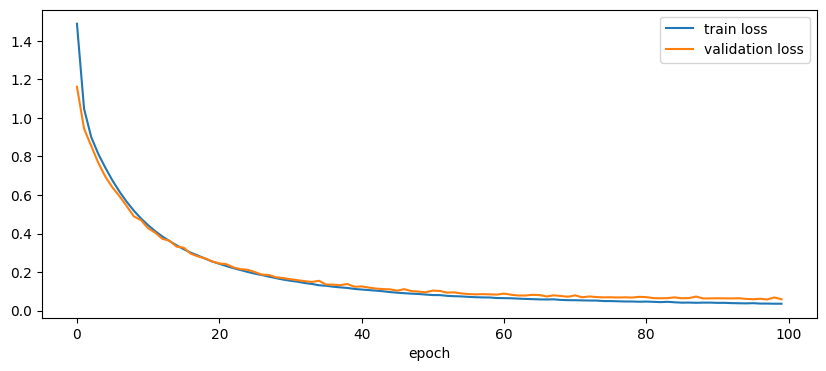

In [ ]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100)

## Evaluate Neural Network Model

Report the model's accuracy on the test set.

In [ ]:
# report model accuracy on test data
with torch.no_grad():
    model.eval()
    acc = 0
    for (data, targets) in test_loader:
        data = data.to(device)
        targets = targets.to(device)

        outputs = model(data.float())
        predicted = torch.argmax(outputs, 1)
        acc += (predicted == targets).sum().item() / len(targets)

print('\ntest accuracy: ',(acc/len(test_loader))*100)


test accuracy:  98.67621527777779


Just for the sake of curiosity, let's take a random sample from the test set and see the model's prediction. So, randomly choose a sample from the test set and print it out (to see its features and also the correct output). Then, feed the features into your model and see what it predicts. Is it correct?

In [ ]:
import random
# TODO: choose a random sample from test data and print it out

indx = random.randint(0,test_df.shape[0]-1)

test_df.iloc[indx:indx+1]

,user_id,Day,origin,destination,start_time,end_time,price,Origin Lat,Origin Lon,Dest Lat,Dest Lon
1488,-1.396337,0.684468,6,3,0.433499,0.554423,0.658328,0.870527,0.978733,-0.175733,0.38977


In [ ]:
# TODO: predict the destination of the above sample
# print out the prediction

ex = test_df.iloc[indx:indx+1].drop('destination',axis=1)
outputs = model(torch.tensor(ex.values).cuda().float())
out = torch.argmax(outputs, 1)
print(f'Predicted: {out[0]}')

Predicted: 3


In [ ]:
# TODO: print out the actual destination of the above sample
ex = test_df["destination"].iloc[indx:indx+1]
print(f'Actual: {ex.values[0]}')

Actual: 3


Now, use the inverse transform of the encoding you used earlier to get the name of the destination from the predicted class. Print it out and see if it's correct.

In [ ]:
# TODO: use inverse_transform to print out the actual name of destination of the above sample
ex = test_df["destination"].iloc[indx:indx+1]
print(f'Name of predicted destination: {place_encoder.inverse_transform(ex.values)[0]}')

Name of predicted destination: pool


**QUESTION**: What do you think about this approach? Is it a good idea to use Neural Networks for this problem? Why (or why not)? If the patterns in our datatset (passengers' history) get more complicated, will our model be robust to it in comparison to other models?

Your Answer: <br/>
Yes. This model learns the pattern better and in a hierarchical manner. So it can capture complex patterns, in contrast to the previous models.

# How to Submit:

Please upload your notebook (`.ipynb`) compressed (as a `.zip` file) or uncompressed on Quera. **Note** that for each part, the accuracy of your model on the given test dataset is important. So, your accuracy should be **at least** same as ours (or better). Also, we will check your code after the submission. So, please make sure that there are no **data snooping** or **data leakage** in your code. You **can not** use the test data in any stages for your model, except for the final evaluation part! So, please be ware of that, or you may lose points.

Your project is graded via 2 main parts:
1. Checking out your implementation (to check if there are no "data snooping" and "data leakage")
   
2. Checking accuracies of your models on the test set.

3. Running again your code by you in the "in-person" session and hearing your explanations (on the parts that we asked questions about the models, overfitting and etc. with tag "QUESTION" in the notebook).